In [1]:
import pandas as pd
import numpy as np
import os
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import datetime

In [2]:
# import cleaned data
age_df = pd.read_csv("output/2019boston_marathon_elevation.csv")

In [3]:
# create lists of data
time_data = age_df["OfficialTime"]
age_data = age_df["AgeOnRaceDay"]

In [4]:
# create list of finishing times in seconds
seconds = []

for time in time_data:
    date_time = datetime.datetime.strptime(time, "%H:%M:%S")
    a_timedelta = date_time - datetime.datetime(1900, 1, 1)
    num_seconds = a_timedelta.total_seconds()
    seconds.append(num_seconds)

In [5]:
# add seconds to dataframe
age_df["Seconds"] = seconds

In [6]:
# create time (in seconds) data to use for plot
second_data = age_df["Seconds"]

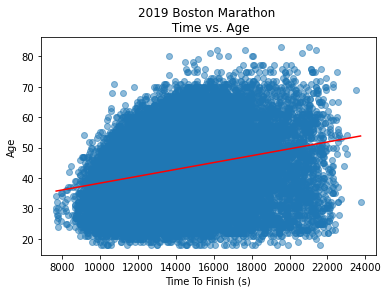

Linear Regression Model: y = 0.0x + 27.06
The correlation coefficient is 0.26


In [7]:
# create plot with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(second_data, age_data)
regress_values = second_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(second_data, age_data, marker="o", alpha=0.5)
plt.plot(second_data, regress_values, "r-")
plt.title(f"2019 Boston Marathon \n Time vs. Age")
plt.xlabel("Time To Finish (s)")
plt.ylabel("Age")
plt.savefig("output/plot_age_regression.png")
plt.show()

correlation = st.pearsonr(second_data, age_data)
print(f"Linear Regression Model: {line_eq}")
print(f"The correlation coefficient is {round(correlation[0],2)}")